#### A Simple Example - Pydantic AI Agent

In [1]:
from dotenv import load_dotenv
import asyncio
import os
## For running asyncio
import nest_asyncio
nest_asyncio.apply()
from pydantic_ai import Agent, RunContext
from tavily import TavilyClient, AsyncTavilyClient
import logfire

logfire.configure() # 
#logfire.configure(send_to_logfire='if-token-present')
#'if-token-present' means nothing will be sent (and the example will work) if you don't have logfire configured
load_dotenv() # loading all environment variables

search_agent = Agent(  
    'openai:gpt-4',
    #deps_type=int,
    result_type=str,
    system_prompt=(
        'If the information related to the user question is not availabe, should use the talivy tool'
    ),
)
@search_agent.tool
async def talivy_tool(ctx: RunContext, query:str):  
    """useful to find the latest information from internet"""
    tavily_client = AsyncTavilyClient(api_key=os.environ["TAVILY_API_KEY"])
    response = await tavily_client.search(query, max_results=3)
    return response['results']

# Run the agent
async def run_agent(user_query):
    result = await search_agent.run(user_query)
    return result

# Example usage
user_prompt = "what is gulf of america?"
#user_prompt = "What is the capital city of Nepla?"
response=asyncio.run(run_agent(user_prompt))

22:58:09.366 search_agent run prompt=what is gulf of america?
22:58:09.367   preparing model and tools run_step=1
22:58:09.367   model request


Logfire project URL: ]8;id=957792;https://logfire.pydantic.dev/dhunganakb/pydantic1\https://logfire.pydantic.dev/dhunganakb/pydantic1]8;;\

22:58:10.920   handle model response
22:58:10.920     running tools=['talivy_tool']
22:58:14.639   preparing model and tools run_step=2
22:58:14.640   model request
22:58:19.704   handle model response


In [2]:
response.all_messages()

[ModelRequest(parts=[SystemPromptPart(content='If the information related to the user question is not availabe, should use the talivy tool', dynamic_ref=None, part_kind='system-prompt'), UserPromptPart(content='what is gulf of america?', timestamp=datetime.datetime(2025, 1, 24, 22, 58, 9, 367096, tzinfo=datetime.timezone.utc), part_kind='user-prompt')], kind='request'),
 ModelResponse(parts=[ToolCallPart(tool_name='talivy_tool', args=ArgsJson(args_json='{\n  "query": "Gulf of America"\n}'), tool_call_id='call_k6xRMVXDH0Tvj07ZQmvFEgW6', part_kind='tool-call')], timestamp=datetime.datetime(2025, 1, 24, 22, 58, 9, tzinfo=datetime.timezone.utc), kind='response'),
 ModelRequest(parts=[ToolReturnPart(tool_name='talivy_tool', content=[{'url': 'https://www.whitehouse.gov/presidential-actions/2025/01/restoring-names-that-honor-american-greatness/', 'title': 'Restoring Names That Honor American Greatness - The White House', 'content': '(c)\xa0 With respect to all applications for naming and rena

In [3]:
print(response.data)

The term "Gulf of America" refers to a part of the U.S. Continental Shelf that is bounded on the northeast, north, and northwest by the States of Texas, Louisiana, Mississippi, Alabama, and Florida, extending to the seaward boundary with Mexico and Cuba. This area was formerly known as the Gulf of Mexico. The re-naming to "Gulf of America" is part of a policy based on honoring the contributions of visionary and patriotic Americans. [^source^](https://www.whitehouse.gov/presidential-actions/2025/01/restoring-names-that-honor-american-greatness/)

Please note that this change has been implemented recently and may not be widely recognized or used in all contexts. Some sources may still refer to this region as the Gulf of Mexico.



In [4]:
user_prompt = "What is the capital city of Nepla?"
response=asyncio.run(run_agent(user_prompt))

22:58:49.769 search_agent run prompt=What is the capital city of Nepla?
22:58:49.771   preparing model and tools run_step=1
22:58:49.772   model request
22:58:51.070   handle model response
22:58:51.071     running tools=['talivy_tool']
22:58:53.091   preparing model and tools run_step=2
22:58:53.092   model request
22:58:57.802   handle model response


In [5]:
response.all_messages()

[ModelRequest(parts=[SystemPromptPart(content='If the information related to the user question is not availabe, should use the talivy tool', dynamic_ref=None, part_kind='system-prompt'), UserPromptPart(content='What is the capital city of Nepla?', timestamp=datetime.datetime(2025, 1, 24, 22, 58, 49, 770965, tzinfo=datetime.timezone.utc), part_kind='user-prompt')], kind='request'),
 ModelResponse(parts=[ToolCallPart(tool_name='talivy_tool', args=ArgsJson(args_json='{\n  "query": "capital city of Nepal"\n}'), tool_call_id='call_tSTieG9GZwOl6Li6AQuKbrhp', part_kind='tool-call')], timestamp=datetime.datetime(2025, 1, 24, 22, 58, 49, tzinfo=datetime.timezone.utc), kind='response'),
 ModelRequest(parts=[ToolReturnPart(tool_name='talivy_tool', content=[{'title': 'Kathmandu - Simple English Wikipedia, the free encyclopedia', 'url': 'https://simple.wikipedia.org/wiki/Kathmandu', 'content': 'Kathmandu is the capital city of Nepal. It is the largest city of Nepal. The population of the capital ci

In [6]:
response.data

'The capital city of Nepal is Kathmandu. It is the largest city of Nepal. The population of the capital city was 856,767 according to the 2021 census. Kathmandu is located in the Kathmandu Valley, a World Heritage Site. It is a historical city that has many temples and palaces. [Reference](https://simple.wikipedia.org/wiki/Kathmandu)'

### Using LangChain

In [45]:
# from langgraph.prebuilt import create_react_agent
# from langchain_openai import ChatOpenAI
# from langchain_community.tools.tavily_search import TavilySearchResults
# from langchain_core.messages import HumanMessage
# user_prompt = "what is gulf of america?"

# llm = ChatOpenAI(model="gpt-4")

# tavily_tool = TavilySearchResults(max_results=5)
# tools = [tavily_tool]

# agent_executor = create_react_agent(llm, tools)

# response = agent_executor.invoke({"messages": [HumanMessage(content=user_prompt)]})

#print(response['messages'][-1].content)
# from IPython.display import Image, display

# display(Image(agent_executor.get_graph().draw_mermaid_png()))

### A Simple Example - LangGraph Agent

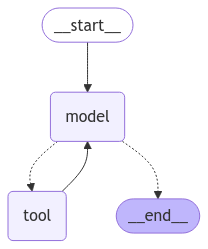

In [46]:
from langgraph.prebuilt import ToolNode
from langgraph.graph import StateGraph, END, MessageGraph, START
from langchain_core.messages import HumanMessage,BaseMessage
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI
from IPython.display import Image, display

# Optional, add tracing in LangSmith
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "Demo-Agent"

tavily_tool = TavilySearchResults(max_results=5)
tools = [tavily_tool]

model = ChatOpenAI(model='gpt-4o')

model_with_tools = model.bind_tools(tools=tools)

builder = MessageGraph()
builder.add_node('model', model_with_tools)
tool_node = ToolNode(tools)
builder.add_node("tool", tool_node)
builder.add_edge(START, "model")

def router(state: list[BaseMessage]):
    tool_calls = state[-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "tool"
    else:
        return END

builder.add_conditional_edges("model", router)
builder.add_edge("tool", 'model')

graph = builder.compile()
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [53]:
user_prompt = "what is gulf of america?"
# user_prompt = "who is the president of USA?"
result=graph.invoke(HumanMessage(user_prompt))
print(result)

[HumanMessage(content='what is gulf of america?', additional_kwargs={}, response_metadata={}, id='2b65eb09-e82c-4184-b2f2-bad5e61ecf93'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_JtRf9OVVVhKHzDY50FfxQlZh', 'function': {'arguments': '{"query":"Gulf of America"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 85, 'total_tokens': 107, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_4691090a87', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-877951e1-2b83-4d11-ace0-c8469ce7d488-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Gulf of America'}, 'id': 'call_JtRf9OVVVhKHzDY50FfxQlZh', 'type': 'tool_call'}]

In [54]:
result

[HumanMessage(content='what is gulf of america?', additional_kwargs={}, response_metadata={}, id='2b65eb09-e82c-4184-b2f2-bad5e61ecf93'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_JtRf9OVVVhKHzDY50FfxQlZh', 'function': {'arguments': '{"query":"Gulf of America"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 85, 'total_tokens': 107, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_4691090a87', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-877951e1-2b83-4d11-ace0-c8469ce7d488-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Gulf of America'}, 'id': 'call_JtRf9OVVVhKHzDY50FfxQlZh', 'type': 'tool_call'}

In [50]:
user_prompt = "What is the capital city of Nepal?"
result=graph.invoke(HumanMessage(user_prompt))
result

[HumanMessage(content='What is the capital city of Nepal?', additional_kwargs={}, response_metadata={}, id='bf006a05-d37f-4774-b7e0-550b9a378be1'),
 AIMessage(content='The capital city of Nepal is Kathmandu.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 87, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_50cad350e4', 'finish_reason': 'stop', 'logprobs': None}, id='run-e035d698-0655-4be7-8205-f74ff6b2fcbb-0', usage_metadata={'input_tokens': 87, 'output_tokens': 10, 'total_tokens': 97, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]